In [1]:
from __future__ import print_function 
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras import backend as K

Using TensorFlow backend.


In [2]:
# Plot ad hoc mnist instances  
from keras.datasets import mnist 
import matplotlib.pyplot as plt 

In [3]:
# load (downloaded if needed) the MNIST dataset 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

11493376/11490434 [==============================] - 4s 0us/step


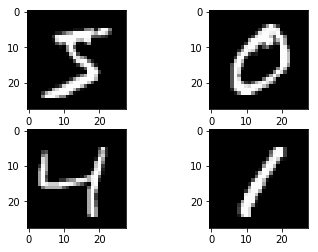

In [4]:
# plot 4 images as gray scale 
plt.subplot(221) 
plt.imshow(X_train[0], cmap=plt.get_cmap('gray')) 
plt.subplot(222) 
plt.imshow(X_train[1], cmap=plt.get_cmap('gray')) 
plt.subplot(223) 
plt.imshow(X_train[2],cmap=plt.get_cmap('gray')) 
plt.subplot(224) 
plt.imshow(X_train[3],cmap=plt.get_cmap('gray'))  
# show the plot 
plt.show() 

In [5]:
# 128 training samples are used as a batch each time ; one epochs would go through the entire 60,000 
batch_size = 128 
num_classes = 10 
epochs = 12 

In [6]:
# input image dimensions 
img_rows, img_cols = 28, 28 

In [7]:
if K.image_data_format() == 'channels_first': 
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1) 
 

In [8]:
# normalize the data
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255 
X_test /= 255 

In [9]:
# verify the data size
print('X_train shape:', X_train.shape) 
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples')  

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [16]:
# convert class vectors to binary class matrices 
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes) 
# Now we have the trainind data(X_train,y_train) and testing data(X_test,y_test)

In [24]:
y_test.shape

(10000, 10)

In [18]:
# build a ConvNet 
model = Sequential() 
model.add(Conv2D(32, kernel_size=(3, 3),                  
                 activation='relu',                  
                 input_shape=input_shape)) 
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) 

model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(num_classes, activation='softmax')) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
# Compile the ConvNe
# define the loss function, optimizer 
model.compile(loss=keras.losses.categorical_crossentropy,               
              optimizer=keras.optimizers.Adadelta(),               
              metrics=['accuracy']) 

In [20]:
# train our model 
model.fit(X_train, y_train,           
          batch_size=batch_size,           
          epochs=epochs,           
          verbose=1,           
          validation_data=(X_test, y_test))# test the model
#one epochs would go through the entire 60,000, and we implement 12 epochs

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 135us/step - loss: 0.2769 - acc: 0.9144 - val_loss: 0.0614 - val_acc: 0.9793
Epoch 2/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0920 - acc: 0.9734 - val_loss: 0.0465 - val_acc: 0.9842
Epoch 3/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0676 - acc: 0.9801 - val_loss: 0.0348 - val_acc: 0.9891
Epoch 4/12
60000/60000 [==============================] - 5s 83us/step - loss: 0.0565 - acc: 0.9829 - val_loss: 0.0341 - val_acc: 0.9889
Epoch 5/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.0474 - acc: 0.9857 - val_loss: 0.0322 - val_acc: 0.9891
Epoch 6/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.0428 - acc: 0.9869 - val_loss: 0.0295 - val_acc: 0.9900
Epoch 7/12
60000/60000 [==============================] - 5s 82us/step - loss: 

In [22]:
# print out the result
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 
# Gets to 99.18% test accuracy after 12 epochs 

Test loss: 0.02814412045671461
Test accuracy: 0.9918


In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________